# Homework 5. Pandas - Titanic

***Double Click here to edit this cell***

- Name: 조성현
- Student ID: 201803430 
- Submission date: 05.16

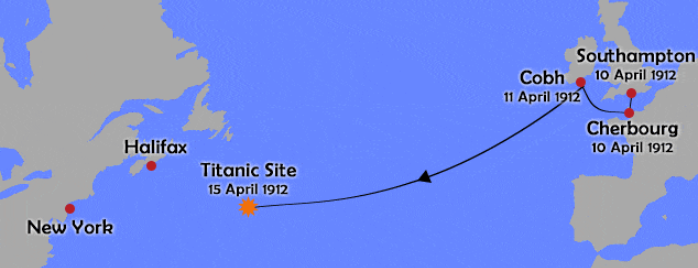

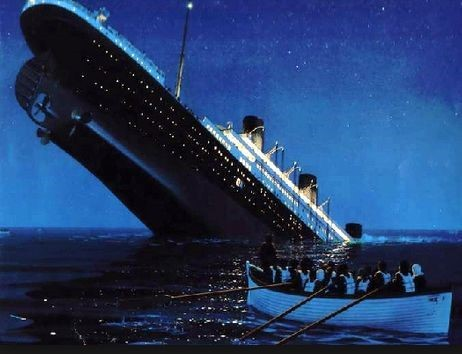

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic_dataset.csv')

### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- name: Name 
- sex: {'male', 'female'} 
- age: Age
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  
- boat: boat # of survived passengers

## Some Exercises

### You should find pandas functions by googling or from pandas reference manual

In [3]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [4]:
titanic.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [5]:
titanic.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [6]:
titanic[['boat']].head(10)

,boat
0,2
1,11
2,NaN
3,NaN
4,NaN
5,3
6,10
7,NaN
8,D
9,NaN


In [7]:
titanic[titanic['boat'].notnull()]['boat'].value_counts().sort_index()

1           5
10         29
11         25
12         19
13         39
13 15       2
13 15 B     1
14         33
15         37
15 16       1
16         23
2          13
3          26
4          31
5          27
5 7         2
5 9         1
6          20
7          23
8          23
8 10        1
9          25
A          11
B           9
C          38
C D         2
D          20
Name: boat, dtype: int64

Remove all passengers who were in more than one boat. They are unclear data.

In [8]:
exactly_one = lambda x: len(str(x).strip().split()) == 1

titanic[(titanic['boat'].notnull()) & titanic['boat'].apply(exactly_one)]['boat'].value_counts().sort_index()

1      5
10    29
11    25
12    19
13    39
14    33
15    37
16    23
2     13
3     26
4     31
5     27
6     20
7     23
8     23
9     25
A     11
B      9
C     38
D     20
Name: boat, dtype: int64

## Problem 1. Find mean fare that the first class passengers paid (5 pts)
- Note that there are many unpaid free passengers. They are out of consideration.
- 1 pound when Titanic launched is worth 57.5 US dollars. 
- Suppose US currency exchange ratio is 1,280 won per dollar.
- Before printing, truncate to two decimal places

In [9]:
# YOUR CODE HERE
import numpy as np


firstclass= titanic[titanic.pclass ==1]
fare_first = firstclass[['fare']]
fare_first = fare_first.fillna(0)
fare_first_paid=fare_first[fare_first['fare']>0]

np.mean(fare_first_paid.fare)

mean_cost = np.mean(fare_first_paid.fare)*1280*57.5

print("mean fare that the first class passengers paid = ",round(mean_cost,2))

mean fare that the first class passengers paid =  6583334.67


```
mean fare that the first class passengers paid = 6583334.67
```

## Problem 2. (15 pts)
### 2.1 Find the **name**s who paid the highest **fare**. Are they **survived**?

In [10]:
# YOUR CODE HERE
maxfare = max(titanic.fare)
rich_guys = titanic[titanic.fare == maxfare]
info_rich = rich_guys[['name','survived']]
print(info_rich)

                                                  name  survived
49                  Cardeza, Mr. Thomas Drake Martinez         1
50   Cardeza, Mrs. James Warburton Martinez (Charlo...         1
183                             Lesurer, Mr. Gustave J         1
302                                   Ward, Miss. Anna         1


```
                                                  name  survived
49                  Cardeza, Mr. Thomas Drake Martinez         1
50   Cardeza, Mrs. James Warburton Martinez (Charlo...         1
183                             Lesurer, Mr. Gustave J         1
302                                   Ward, Miss. Anna         1
```

### 2.2 Find the **name**s who paid the lowest **fare**. Are they **survived**?

In [11]:
# YOUR CODE HERE
low_pay = titanic[titanic.fare == min(titanic.fare)]
info_low = low_pay[['name','survived']]
print(info_low)

                                       name  survived
7                    Andrews, Mr. Thomas Jr         0
70    Chisholm, Mr. Roderick Robert Crispin         0
125                        Fry, Mr. Richard         0
150                   Harrison, Mr. William         0
170                 Ismay, Mr. Joseph Bruce         1
223           Parr, Mr. William Henry Marsh         0
234         Reuchlin, Jonkheer. John George         0
363                   Campbell, Mr. William         0
384          Cunningham, Mr. Alfred Fleming         0
410        Frost, Mr. Anthony Wood "Archie"         0
473                    Knight, Mr. Robert J         0
528             Parkes, Mr. Francis "Frank"         0
581              Watson, Mr. Ennis Hastings         0
896                     Johnson, Mr. Alfred         0
898         Johnson, Mr. William Cahoone Jr         0
963                     Leonard, Mr. Lionel         0
1254           Tornquist, Mr. William Henry         1


```
                                       name  pclass  survived
7                    Andrews, Mr. Thomas Jr       1         0
70    Chisholm, Mr. Roderick Robert Crispin       1         0
125                        Fry, Mr. Richard       1         0
150                   Harrison, Mr. William       1         0
170                 Ismay, Mr. Joseph Bruce       1         1
223           Parr, Mr. William Henry Marsh       1         0
234         Reuchlin, Jonkheer. John George       1         0
363                   Campbell, Mr. William       2         0
384          Cunningham, Mr. Alfred Fleming       2         0
410        Frost, Mr. Anthony Wood "Archie"       2         0
473                    Knight, Mr. Robert J       2         0
528             Parkes, Mr. Francis "Frank"       2         0
581              Watson, Mr. Ennis Hastings       2         0
896                     Johnson, Mr. Alfred       3         0
898         Johnson, Mr. William Cahoone Jr       3         0
963                     Leonard, Mr. Lionel       3         0
1254           Tornquist, Mr. William Henry       3         1
```

### 2.3 Find the **name**s who paid the lowest **fare** (> 0). Are they **survived**?

In [12]:
# YOUR CODE HERE
pay = titanic[titanic.fare != min(titanic.fare)]
lowest_fare = pay[pay.fare == min(pay.fare)]
info_lowest = lowest_fare[['name','pclass','survived']]
print(info_lowest)

                           name  pclass  survived
1082  Olsen, Master. Artur Karl       3         1


```
                           name  pclass  survived
1082  Olsen, Master. Artur Karl       3         1
```

## Problem 3. (10 pts)
### 3.1 Find the survival ratio of the passengers who paid more than 0 and less than or equal to the mean fare of third class

In [13]:
# YOUR CODE HERE
# in question statement    0< fare <= thirdclass.fare.mean

thirdclass =titanic[titanic.pclass == 3]
third_fare_mean  = np.mean(thirdclass.fare)


want = titanic[0 < titanic.fare]
want = want[want.fare <= third_fare_mean]

alive = want[want.survived == 1]
dead = want[want.survived == 0]


survival_ratio_low = round((len(alive)/(len(dead)+len(alive)) )*100,2)

print("survival ratio of low 1 group = "+str(survival_ratio_low)+"%")


survival ratio of low 1 group = 25.33%


```
survival ratio of low 1 group = 25.33%
```

### 3.2 Find the survival ratio of the passengers who paid more than the mean fare of first class

In [14]:
# YOUR CODE HERE
firstclass =titanic[titanic.pclass == 1]
first_fare_mean  = np.mean(firstclass.fare)


want = titanic[first_fare_mean < titanic.fare]

alive = want[want.survived == 1]
dead = want[want.survived == 0]


survival_ratio_high = round((len(alive)/(len(dead)+len(alive)) )*100,2)
print("survival ratio of low 1 group = "+str(survival_ratio_high)+"%")

survival ratio of low 1 group = 72.16%


```
survival ratio of high 1 group = 72.16%
```

## Problem 4. (10 pts)
### 4.1 Plot the number of male and female passengers

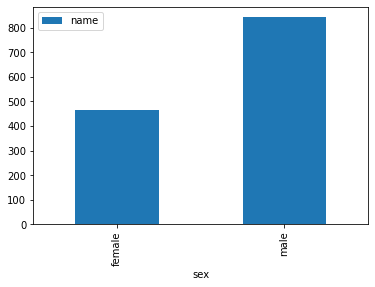

In [15]:
# YOUR CODE HERE

import matplotlib.pyplot as plt

df =titanic['name'].groupby(titanic['sex']).size()
dfname = pd.DataFrame(df).T   
data = {'sex': ['female','male'],
        'name': dfname.loc['name']
       }
  
df = pd.DataFrame(data,columns=['sex','name'])
df.plot(x ='sex', y='name', kind = 'bar')
plt.show()

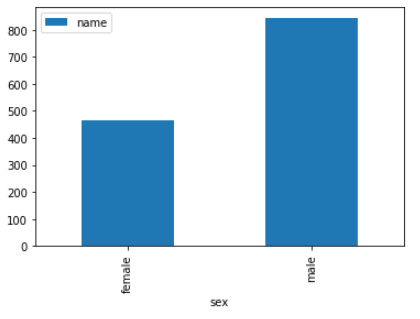

### 4.2 Plot mean age and mean fare by sex

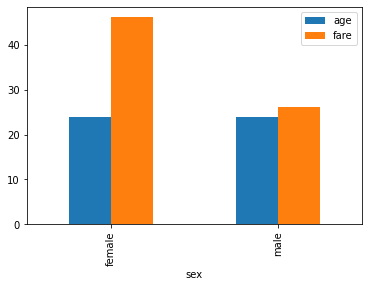

In [16]:
# YOUR CODE HERE
titanictmp=titanic
titanictmp=titanictmp.fillna(0)
want_mean= titanictmp[['age','fare','sex']].groupby('sex').mean()
fare_age = pd.DataFrame(want_mean).T   

data = {'sex': ['female','male'],
        'age': fare_age.loc['age'],
        'fare': fare_age.loc['fare']
       }

df = pd.DataFrame(data,columns=['sex','age','fare'])
df.plot(x ='sex', kind = 'bar')
plt.show()


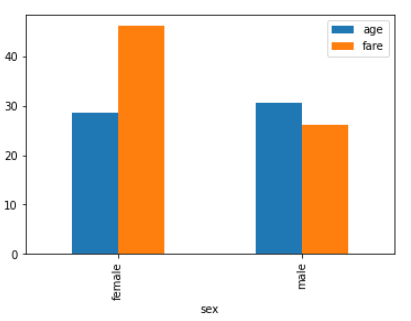

## Problem 5. (10 pts)
### 5.1 Find the number of passengers by passenger's title.

In [17]:
# YOUR CODE HERE
trname = titanic[['name','fare']]
nametag =[]
money =[]
count = 0
for nameg in trname.name :
        nameg = nameg.replace(',','.')
        nameg = nameg.replace(' ','')
        namesplit = nameg.split('.')
        if "the" in namesplit[1] :
            namesplit[1]=namesplit[1].replace("the","")
        nametag.append(namesplit[1]+".")
        money.append(trname.fare[count])
        count+=1
        
data = { 'name' :nametag,
         'fare' :money
       }
df_tag = pd.DataFrame(data)
print(df_tag.name.value_counts())

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Ms.            2
Major.         2
Capt.          1
Sir.           1
Dona.          1
Jonkheer.      1
Countess.      1
Don.           1
Mme.           1
Lady.          1
Name: name, dtype: int64


```
 Mr.          757
 Miss.        260
 Mrs.         197
 Master.       61
 Rev.           8
 Dr.            8
 Col.           4
 Ms.            2
 Mlle.          2
 Major.         2
 Jonkheer.      1
 Sir.           1
 Capt.          1
 Countess.      1
 Lady.          1
 Don.           1
 Mme.           1
 Dona.          1
Name: name, dtype: int64
```

### 5.2 Plot the mean fare by passenger's title

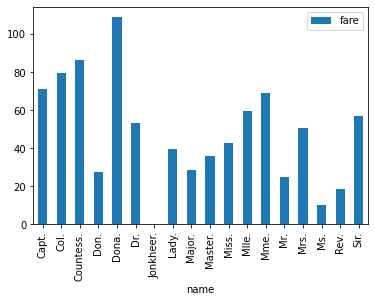

In [18]:
# YOUR CODE HERE
# YOUR CODE HERE


df_tag=df_tag.fillna(0)
want_mean= df_tag.groupby('name').mean()
fare_tag = pd.DataFrame(want_mean).plot(kind = 'bar')
plt.show()

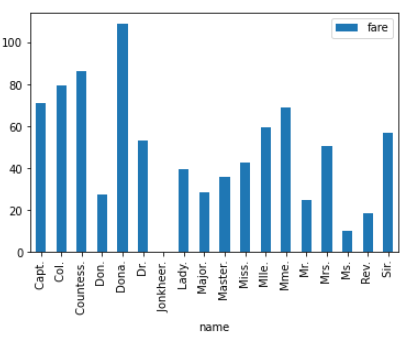

## Problem 6. (15 pts)
### Compute the confidence and support for the following cases:

Confidences:
- P(survived = 1 | sex=female, pclass=1)
- P(survived = 1 | sex=female, pclass=2)
- P(survived = 1 | sex=female, pclass=3)
- P(survived = 1 | sex=male, pclass=1)
- P(survived = 1 | sex=male, pclass=2)
- P(survived = 1 | sex=male, pclass=3)
- P(survived = 1 | age <= 10, pclass=1)
- P(survived = 1 | age <= 10, pclass=2)
- P(survived = 1 | age <= 10, pclass=3)

Support:
- P(survived = 1, sex=female, pclass=1)
- P(survived = 1, sex=female, pclass=2)
- P(survived = 1, sex=female, pclass=3)
- P(survived = 1, sex=male, pclass=1)
- P(survived = 1, sex=male, pclass=2)
- P(survived = 1, sex=male, pclass=3)
- P(survived = 1, age <= 10, pclass=1)
- P(survived = 1, age <= 10, pclass=2)
- P(survived = 1, age <= 10, pclass=3)

### 6.1 P(survived = 1 | sex=female, pclass=1), P(survived = 1, sex=female, pclass=1)

In [19]:
# YOUR CODE HERE
total = len(titanic)

tmp1 = titanic[(titanic.sex =='female')& ((titanic.pclass == 1))]

Confidence = len(tmp1[tmp1.survived == 1])/len(tmp1)

tmp2 = titanic[(titanic.survived ==1) & (titanic.sex =='female')& ((titanic.pclass == 1))]
Supportp = len(tmp2) / total




print("Confidence: P(survived = 1 | sex=female, pclass=1) = "+str(round(Confidence*100,2))+"%")
print("Support: P(survived = 1, sex=female, pclass=1) = "+str(round(Supportp*100,2))+"%")

Confidence: P(survived = 1 | sex=female, pclass=1) = 96.53%
Support: P(survived = 1, sex=female, pclass=1) = 10.62%


```
Confidence: P(survived = 1 | sex=female, pclass=1) = 96.53%
Support: P(survived = 1, sex=female, pclass=1) = 10.62%
```

### 6.2 P(survived = 1 | sex=female, pclass=2), P(survived = 1, sex=female, pclass=2)

In [20]:
# YOUR CODE HERE

tmp1 = titanic[(titanic.sex =='female')& ((titanic.pclass == 2))]

Confidence = len(tmp1[tmp1.survived == 1])/len(tmp1)

tmp2 = titanic[(titanic.survived ==1) & (titanic.sex =='female')& ((titanic.pclass == 2))]
Supportp = len(tmp2) / total




print("Confidence: P(survived = 1 | sex=female, pclass=2) = "+str(round(Confidence*100,2))+"%")
print("Support: P(survived = 1, sex=female, pclass=2) = "+str(round(Supportp*100,2))+"%")

Confidence: P(survived = 1 | sex=female, pclass=2) = 88.68%
Support: P(survived = 1, sex=female, pclass=2) = 7.18%


```
Confidence: P(survived = 1 | sex=female, pclass=2) = 88.68%
Support: P(survived = 1, sex=female, pclass=2) = 7.18%
```

### 6.3 P(survived = 1 | sex=female, pclass=3), P(survived = 1, sex=female, pclass=3)

In [21]:
# YOUR CODE HERE
# YOUR CODE HERE

tmp1 = titanic[(titanic.sex =='female')& ((titanic.pclass == 3))]

Confidence = len(tmp1[tmp1.survived == 1])/len(tmp1)

tmp2 = titanic[(titanic.survived ==1) & (titanic.sex =='female')& ((titanic.pclass == 3))]
Supportp = len(tmp2) / total




print("Confidence: P(survived = 1 | sex=female, pclass=3) = "+str(round(Confidence*100,2))+"%")
print("Support: P(survived = 1, sex=female, pclass=3) = "+str(round(Supportp*100,2))+"%")

Confidence: P(survived = 1 | sex=female, pclass=3) = 49.07%
Support: P(survived = 1, sex=female, pclass=3) = 8.1%


```
Confidence: P(survived = 1 | sex=female, pclass=3) = 49.07%
Support: P(survived = 1, sex=female, pclass=3) = 8.10%
```

### 6.4 P(survived = 1 | sex=male, pclass=1), P(survived = 1, sex=male, pclass=1)

In [22]:
# YOUR CODE HERE

tmp1 = titanic[(titanic.sex =='male')& ((titanic.pclass == 1))]

Confidence = len(tmp1[tmp1.survived == 1])/len(tmp1)

tmp2 = titanic[(titanic.survived ==1) & (titanic.sex =='male')& ((titanic.pclass == 1))]
Supportp = len(tmp2) / total




print("Confidence: P(survived = 1 | sex=male, pclass=1) = "+str(round(Confidence*100,2))+"%")
print("Support: P(survived = 1, sex=male, pclass=1) = "+str(round(Supportp*100,2))+"%")

Confidence: P(survived = 1 | sex=male, pclass=1) = 34.08%
Support: P(survived = 1, sex=male, pclass=1) = 4.66%


```
Confidence: P(survived = 1 | sex=male, pclass=1) = 34.08%
Support: P(survived = 1, sex=male, pclass=1) = 4.66%
```

### 6.5 P(survived = 1 | sex=male, pclass=2), P(survived = 1, sex=male, pclass=2)

In [23]:
# YOUR CODE HERE
tmp1 = titanic[(titanic.sex =='male')& ((titanic.pclass == 2))]

Confidence = len(tmp1[tmp1.survived == 1])/len(tmp1)

tmp2 = titanic[(titanic.survived ==1) & (titanic.sex =='male')& ((titanic.pclass == 2))]
Supportp = len(tmp2) / total




print("Confidence: P(survived = 1 | sex=male, pclass=2) = "+str(round(Confidence*100,2))+"%")
print("Support: P(survived = 1, sex=male, pclass=2) = "+str(round(Supportp*100,2))+"%")

Confidence: P(survived = 1 | sex=male, pclass=2) = 14.62%
Support: P(survived = 1, sex=male, pclass=2) = 1.91%


```
Confidence: P(survived = 1 | sex=male, pclass=2) = 14.62%
Support: P(survived = 1, sex=male, pclass=2) = 1.91%
```

### 6.6 P(survived = 1 | sex=male, pclass=3), P(survived = 1, sex=male, pclass=3)

In [24]:
# YOUR CODE HERE
tmp1 = titanic[(titanic.sex =='male')& ((titanic.pclass == 3))]

Confidence = len(tmp1[tmp1.survived == 1])/len(tmp1)

tmp2 = titanic[(titanic.survived ==1) & (titanic.sex =='male')& ((titanic.pclass == 3))]
Supportp = len(tmp2) / total




print("Confidence: P(survived = 1 | sex=male, pclass=3) = "+str(round(Confidence*100,2))+"%")
print("Support: P(survived = 1, sex=male, pclass=3) = "+str(round(Supportp*100,2))+"%")


Confidence: P(survived = 1 | sex=male, pclass=3) = 15.21%
Support: P(survived = 1, sex=male, pclass=3) = 5.73%


```
Confidence: P(survived = 1 | sex=male, pclass=3) = 15.21%
Support: P(survived = 1, sex=male, pclass=3) = 5.73%
```

### 6.7 P(survived = 1 | age <= 10, pclass=1), P(survived = 1,  age <= 10, pclass=1)

In [25]:
# YOUR CODE HERE
tmp1 = titanic[(titanic.age <=10)& ((titanic.pclass == 1))]

Confidence = len(tmp1[tmp1.survived == 1])/len(tmp1)

tmp2 = titanic[(titanic.survived ==1) & (titanic.age <=10)& ((titanic.pclass == 1))]
Supportp = len(tmp2) / total

print("Confidence: P(survived = 1 | age <=10, pclass=1) = "+str(round(Confidence*100,2))+"%")
print("Support: P(survived = 1, age <=10, pclass=1) = "+str(round(Supportp*100,2))+"%")

Confidence: P(survived = 1 | age <=10, pclass=1) = 75.0%
Support: P(survived = 1, age <=10, pclass=1) = 0.23%


```
Confidence: P(survived = 1 | age <= 10, pclass=1) = 75.00%
Support: P(survived = 1, age <= 10, pclass=1) = 0.23%
```

### 6.8 P(survived = 1 | age <= 10, pclass=2), P(survived = 1,  age <= 10, pclass=2)

In [26]:
# YOUR CODE HERE
tmp1 = titanic[(titanic.age <=10)& ((titanic.pclass == 2))]

Confidence = len(tmp1[tmp1.survived == 1])/len(tmp1)

tmp2 = titanic[(titanic.survived ==1) & (titanic.age <=10)& ((titanic.pclass == 2))]
Supportp = len(tmp2) / total

print("Confidence: P(survived = 1 | age <=10, pclass=2) = "+str(round(Confidence*100,2))+"%")
print("Support: P(survived = 1, age <=10, pclass=2) = "+str(round(Supportp*100,2))+"%")

Confidence: P(survived = 1 | age <=10, pclass=2) = 100.0%
Support: P(survived = 1, age <=10, pclass=2) = 1.68%


```
Confidence: P(survived = 1 | age <= 10, pclass=2) = 100.00%
Support: P(survived = 1, age <= 10, pclass=2) = 1.68%
```

### 6.9 P(survived = 1 | age <= 10, pclass=3), P(survived = 1,  age <= 10, pclass=3)

In [27]:
# YOUR CODE HERE
tmp1 = titanic[(titanic.age <=10)& ((titanic.pclass == 3))]

Confidence = len(tmp1[tmp1.survived == 1])/len(tmp1)

tmp2 = titanic[(titanic.survived ==1) & (titanic.age <=10)& ((titanic.pclass == 3))]
Supportp = len(tmp2) / total

print("Confidence: P(survived = 1 | age <=10, pclass=3) = "+str(round(Confidence*100,2))+"%")
print("Support: P(survived = 1, age <=10, pclass=3) = "+str(round(Supportp*100,2))+"%")

Confidence: P(survived = 1 | age <=10, pclass=3) = 41.67%
Support: P(survived = 1, age <=10, pclass=3) = 1.91%


```
Confidence: P(survived = 1 | age <= 10, pclass=3) = 41.67%
Support: P(survived = 1, age <= 10, pclass=3) = 1.91%
```

### 6.10 Discussion

- Discuss what you learned from this analysis
- WRITE HERE (To edit, double click this cell)
```
생존자 전체 그룹에서 여성이고 1등급 칸인 사람들이 가장 많이 살아 남았다.

생존자 전체 그룹에서 가장 적은 비율을 차지 하는 것은 10세 미만의 1등급 칸에 탔던 인원이지만 ,이들의 그룹은 75% 의 확률로 생존을 했다.
즉 10세 미만 1등급의 인원은 전체 타이타닉에 승선인원수 대비 인원이 적어 생존자 전체 그룹에서 가장 적은 비율을 차지하는 결과를 보인다.

pclass 별 10세 미만의 인원은 pclass 별 생존율 차이가 일정 하지 않은걸 토대로 , 나이거 어리면 등급에 상관없이 구명정에 태운것으로 보인다.

대체적으로 여성의 생존 비율이 남성의 생존 비율보다 높으며, 놀랍게도 3등급 남성보다 2등급의 남성의 전체적인 생존율이 더 낮고
전체 생존인원들의 비율도 더낮다. 2등급과 3등급의 남성의 생존율 차이는 없어 보인다.

```


## Problem 7. (10 pts)
### 7.1 Plot numbers of survived and numbers of dead by passenger classes

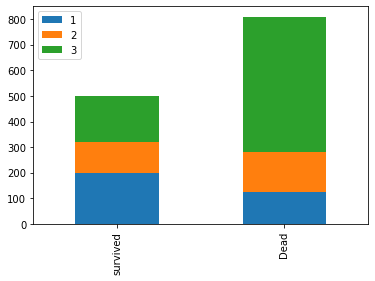

In [28]:
# YOUR CODE HERE
train = titanic
def bar_chart(feature,dft):
    survived = dft[dft['survived']==1][feature].value_counts()
    dead = dft[dft['survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','Dead']
    df.plot(kind='bar',stacked=True)
    #df.plot(kind='bar',stacked=False)

bar_chart("pclass",train)

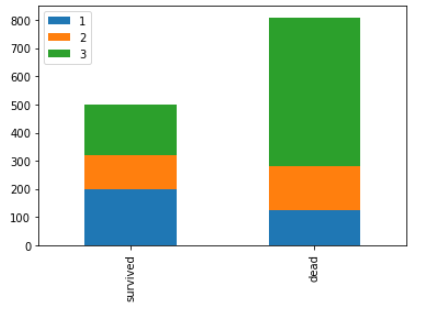

### 7.2 Plot numbers of survived and numbers of dead by passenger age intervals
-  0:   0 $\le$ age $\lt$ 20
- 20: 20 $\le$ age $\lt$ 40
- 40: 40 $\le$ age $\lt$ 60
- 60: 60 $\le$ age $\lt$ 80
- 80: 80 $\le$ age

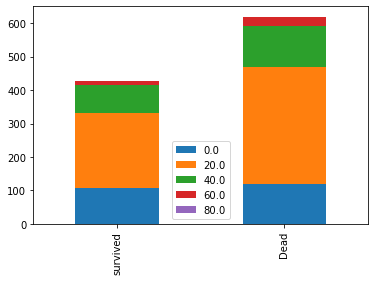

In [29]:
# YOUR CODE HERE

dataset = titanic
dataset.loc[(dataset['age'] >= 0) & (dataset['age'] <  20), 'age'] = 0
dataset.loc[(dataset['age'] >= 20) & (dataset['age'] <40), 'age'] = 20
dataset.loc[(dataset['age'] >=40) & (dataset['age'] <60), 'age'] = 40
dataset.loc[(dataset['age'] >=60) & (dataset['age'] <80), 'age'] = 60
dataset.loc[ dataset['age'] >=80, 'age'] = 80
age_train = dataset[['age','survived']]

bar_chart("age",age_train)

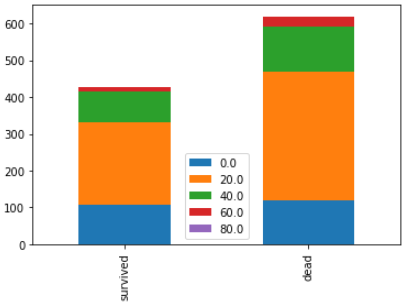

### 7.3 Plot numbers of survived and numbers of dead by the ports passenger embarked at

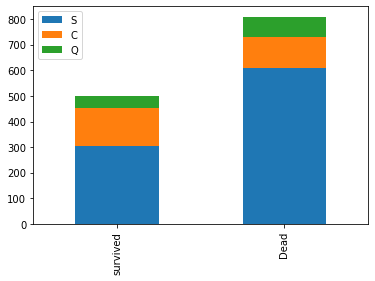

In [30]:
# YOUR CODE HERE
dataset_embarked = titanic
bar_chart("embarked",dataset_embarked)

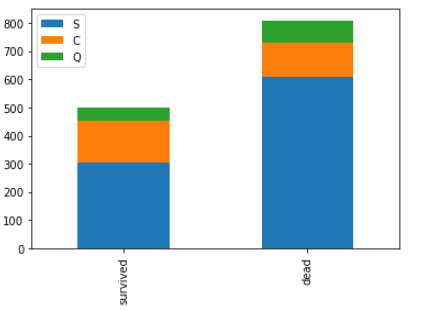

### 7.4 Discussion

- Discuss what you learned from this analysis
- WRITE HERE (To edit, double click this cell)

```
-Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

각각의 객실 등급별 , 나이별 ,선착장 위치별 가장 많은 사망비율을 가진 집단은
3 등급 객실 ,20대,Southampton에서 탑승  이다.

나이는  20대를 제외하고는 나이대 각각의 그룹의 생존율의 큰 차이가 없으며, Cherbourg에서 탑승한 인원들의 생존율도 큰 변화가 없어 보인다.
그러나 객실 별등급에 관하여서는 생존율의 큰 차이를 보이며, 1,2,3 순으로 생존 비율이 급격하게 낮아지는 것을 확인할 수읶다.


객실 등급, 나이,탑승위치에서 직접적으로 영향을 주는것은 객실 등급인것을 유추 할 수 가 있다.
```

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit

- Run **all cells** after restarting the kernel
- Goto "File -> Print Preview"
- Print the page as pdf
- Pdf file name must be in a form of: homework_5_홍길동_202200001.pdf
- Submit the pdf file in google classroom
- No late homeworks will be accepted
- Your homework will be graded on the basis of correctness and programming skills